In [2]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [138]:
df = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\Shared\News_Twitter_Stock_Reddit_NaN.csv")
# df = df.drop(columns = ["Reddit_SelfText", "Twitter_Senti", "News_Senti"])
# df = df.fillna(0)
df = df.drop(['Date', 'Stockname', "Stock_Difference"], axis=1)
# 'News_Senti', "Twitter_Senti", "Reddit_Comment", "Reddit_SelfText",
df = df.dropna().reset_index(drop=True)
df.shape
df

,News_Senti,Volume,Open_USD,High_USD,Low_USD,Close_USD,Adj_Close_USD,Twitter_Senti,Reddit_Comment,Reddit_SelfText
0,-0.013258,13954800.0,0.168756,0.168900,0.164937,0.165278,0.161698,0.354322,0.195632,0.065820
1,0.070484,12513900.0,0.168580,0.169250,0.168421,0.168800,0.165144,0.354322,0.263295,0.223880
2,0.033616,20286800.0,0.166439,0.168949,0.166439,0.168361,0.164714,0.354322,0.309500,-0.189340
3,0.061636,67935700.0,0.178142,0.180494,0.176514,0.180262,0.176358,0.354322,0.316293,-0.402100
4,0.120139,62404000.0,0.177505,0.184407,0.177301,0.183531,0.179556,0.354322,0.034783,0.420870
5,-0.036621,25425400.0,0.184792,0.185902,0.183966,0.185742,0.181719,0.354322,0.073471,-0.102990
6,0.092705,25587400.0,0.186901,0.187061,0.184615,0.184927,0.180922,0.354322,0.234032,0.261930
7,0.101774,23492600.0,0.187136,0.187359,0.185055,0.186555,0.182515,-0.102700,0.199300,0.102714
8,0.052211,24611200.0,0.183645,0.185186,0.183033,0.183795,0.180445,0.354322,0.228048,0.251273
9,0.222372,27390100.0,0.204382,0.205071,0.202789,0.204337,0.200612,0.354322,0.138369,0.299167


In [139]:

# X = df[["Reddit_Comment"]].to_numpy()#.reshape(-1, 1)

X = df.loc[:, df.columns != 'Adj_Close_USD'].to_numpy()
# X = df.drop(['Stock_Difference', 'Date', 'Stockname', 'News_Senti', "Twitter_Senti", "Reddit_Comment", "Reddit_SelfText"], axis=1).to_numpy()

y = df["Adj_Close_USD"].to_numpy()


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

In [141]:
from sklearn.metrics import mean_squared_error, r2_score


regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# The intercept
print("Intercept: ", regr.intercept_)

Coefficients: 
 [ 1.73536405e-01 -3.81867849e-10  1.64414613e-01  1.63279066e-01
  1.58760392e-01  1.57979728e-01  7.77876874e-02  1.17556101e-01
 -9.61995114e-04]
Mean squared error: 0.00
Coefficient of determination: -1.85
Intercept:  0.01121197886938094


In [154]:
for i in range(100, 1100, 100):
    text_classifier = RandomForestRegressor(n_estimators=i, random_state=0)
    text_classifier.fit(X_train, y_train)
    y_pred = text_classifier.predict(X_test)
    print("R^2: ", metrics.r2_score(y_test, y_pred), "n_estimators = ", i)

R^2:  0.8267442336725173 n_estimators =  100
R^2:  0.8269001432672356 n_estimators =  200
R^2:  0.8033690081685231 n_estimators =  300
R^2:  0.8153509296583379 n_estimators =  400
R^2:  0.8358221418687923 n_estimators =  500
R^2:  0.8343661138684478 n_estimators =  600
R^2:  0.8264447208865032 n_estimators =  700
R^2:  0.8276493685349334 n_estimators =  800
R^2:  0.8280775254753218 n_estimators =  900
R^2:  0.8289334011134278 n_estimators =  1000


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

text_classifier = RandomForestRegressor(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)


print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:  0.8358221418687923
Variance Score:  0.8638054554403909
Max Error:  0.02051318894799975
Mean Absolute Error: 0.006089691149809491
Mean Squared Error: 5.9075178854207465e-05
Root Mean Squared Error: 0.007686037916521585


In [146]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
rmse_val = pd.DataFrame(rmse_val)
print(rmse_val)
print(rmse)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6, n_neighbors = 7

In [145]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import numpy as np

rmse_val = [] #to store rmse values for different k
for K in range(7):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
rmse_val = pd.DataFrame(rmse_val)
# print(rmse_val)
print("K = ",rmse_val.idxmin()[0])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6, n_neighbors = 7

In [135]:
from sklearn import metrics
from sklearn import neighbors
from math import sqrt




knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2:  -0.6438447696059946
Variance Score:  -0.6378339367143591
Max Error:  0.06326711700000001
Mean Absolute Error: 0.02113478747169811
Mean Squared Error: 0.0006601342430712627
Root Mean Squared Error: 0.025693077726719752


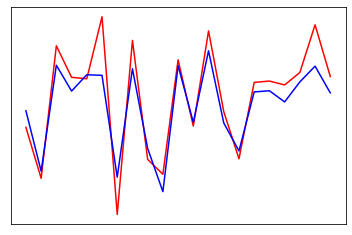

In [156]:
import matplotlib.pyplot as plt

# Plot outputs
# plt.scatter(TwitterSenti, y_test,  color='yellow')
# plt.scatter(TwitterSenti, y_pred, color='blue')
# plt.scatter(NewsSenti, y_pred, color='purple')
# plt.plot(X_test, y_test, color = "blue")
# plt.scatter(X_test, y_pred, color = "yellow")
plt.plot(y_test[0:100], color = "red")
plt.plot(y_pred[0:100], color = "blue")


plt.xticks(())
plt.yticks(())

plt.show()

# print(X_test.shape, y_test.shape)
# print(X_test.shape, y_pred.shape)

# print(y_pred)



In [167]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_pred - y_test)})
test

,Actual,Predicted,Difference
0,-0.020866,-0.105209,-0.084343
1,-0.300488,-0.112562,0.187926
2,0.246803,0.097136,-0.149668
3,0.868060,-0.083677,-0.951738
4,0.461470,0.097136,-0.364334
...,...,...,...
56,0.121431,-0.112562,-0.233993
57,0.522953,0.097136,-0.425817
58,0.090117,-0.105209,-0.195327
59,-0.065902,-0.067132,-0.001230


# CLASSIFIER

In [ ]:
#Classifier

# df1 = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\News\SK-Learn\News_Stock_Data_30.csv")
# X = df1["News_Senti"].to_numpy().reshape(-1, 1)
# y = df1["Stock_Changes"].to_numpy()
# df1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        count += 1
print(count, '/', len(y_test))
print(y_test)
print(y_pred)